In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv("/kaggle/input/int-and-ext/train.csv")
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [3]:
df['Time_spent_Alone'].isna().sum()

1190

In [4]:
df.isna().sum()

id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [6]:
df.describe()

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,18524.000000,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,9261.500000,3.137764,5.265106,4.044319,7.996737,4.982097
std,5347.562529,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4630.750000,1.000000,3.000000,3.000000,5.000000,3.000000
50%,9261.500000,2.000000,5.000000,4.000000,8.000000,5.000000
75%,13892.250000,4.000000,8.000000,6.000000,12.000000,7.000000
max,18523.000000,11.000000,10.000000,7.000000,15.000000,10.000000


In [7]:
df["Stage_fear"].unique()

array(['No', 'Yes', nan], dtype=object)

In [8]:
df["Stage_fear"].value_counts()

Stage_fear
No     12609
Yes     4022
Name: count, dtype: int64

In [9]:
df["Drained_after_socializing"].value_counts()

Drained_after_socializing
No     13313
Yes     4062
Name: count, dtype: int64

In [10]:
df["Drained_after_socializing"].unique()

array(['No', nan, 'Yes'], dtype=object)

In [11]:
df['Drained_after_socializing'].fillna('Yes', inplace=True)
df['Stage_fear'].fillna('Yes', inplace=True)

/tmp/ipykernel_13/2013666444.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Drained_after_socializing'].fillna('Yes', inplace=True)
/tmp/ipykernel_13/2013666444.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [12]:
df.isna().sum()

id                              0
Time_spent_Alone             1190
Stage_fear                      0
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing       0
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

In [13]:
df['Time_spent_Alone'].fillna(df['Time_spent_Alone'].median(), inplace=True)
df['Social_event_attendance'].fillna(df['Social_event_attendance'].mean(), inplace=True)
df['Going_outside'].fillna(df['Going_outside'].mean(), inplace=True)
df['Friends_circle_size'].fillna(df['Friends_circle_size'].mean(), inplace=True)
df['Post_frequency'].fillna(df['Post_frequency'].mean(), inplace=True)

/tmp/ipykernel_13/1563982883.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Time_spent_Alone'].fillna(df['Time_spent_Alone'].median(), inplace=True)
/tmp/ipykernel_13/1563982883.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [14]:
df.isna().sum()

id                           0
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [15]:
df['Personality'].unique()

array(['Extrovert', 'Introvert'], dtype=object)

In [16]:
df['Personality'] = df['Personality'].map({'Extrovert': 1, 'Introvert': 0})

In [17]:
df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.000000,1
1,1,1.0,No,7.0,3.0,No,10.0,8.000000,1
2,2,6.0,Yes,1.0,0.0,Yes,3.0,0.000000,0
3,3,3.0,No,7.0,3.0,No,11.0,5.000000,1
4,4,1.0,No,4.0,4.0,No,13.0,4.982097,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           18524 non-null  float64
 2   Stage_fear                 18524 non-null  object 
 3   Social_event_attendance    18524 non-null  float64
 4   Going_outside              18524 non-null  float64
 5   Drained_after_socializing  18524 non-null  object 
 6   Friends_circle_size        18524 non-null  float64
 7   Post_frequency             18524 non-null  float64
 8   Personality                18524 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 1.3+ MB


In [19]:
# Step 2: Define feature columns
categorical_features = ['Stage_fear','Drained_after_socializing']
numerical_features = ['Time_spent_Alone', 'Social_event_attendance','Going_outside','Friends_circle_size','Post_frequency']

In [20]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [21]:
# One-hot encoder for categorical features
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Standard scaler for numerical features (and one-hot encoded features)
scaler = StandardScaler()

In [22]:
# ColumnTransformer to apply different preprocessing to categorical and numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline([
            ('onehot', one_hot_encoder)
        ]), categorical_features),
        ('num', Pipeline([
            ('scaler', scaler)
        ]), numerical_features)
    ])


In [23]:

# Step 4: Create the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])


In [24]:
df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.000000,1
1,1,1.0,No,7.0,3.0,No,10.0,8.000000,1
2,2,6.0,Yes,1.0,0.0,Yes,3.0,0.000000,0
3,3,3.0,No,7.0,3.0,No,11.0,5.000000,1
4,4,1.0,No,4.0,4.0,No,13.0,4.982097,1


In [25]:
# Step 5: Prepare features and target
X = df.drop(['Personality','id'], axis=1)  # Features
y = df['Personality']               # Numerical target (1/0)


In [26]:
X.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,0.0,No,6.0,4.0,No,15.0,5.000000
1,1.0,No,7.0,3.0,No,10.0,8.000000
2,6.0,Yes,1.0,0.0,Yes,3.0,0.000000
3,3.0,No,7.0,3.0,No,11.0,5.000000
4,1.0,No,4.0,4.0,No,13.0,4.982097


In [27]:
# Step 6: Fit and transform the features using the pipeline
X_transformed = pipeline.fit_transform(X)

In [28]:
# Convert transformed data back to DataFrame for inspection
feature_names = (pipeline.named_steps['preprocessor']
                    .named_transformers_['cat']
                    .named_steps['onehot']
                    .get_feature_names_out(categorical_features)).tolist() + numerical_features
X_transformed_df = pd.DataFrame(X_transformed, columns=feature_names, index=X.index)

In [29]:
# Combine with target for final DataFrame (optional)
df_final = pd.concat([X_transformed_df, y.rename('Personality')], axis=1)

In [30]:
df_final.head()

,Stage_fear_Yes,Drained_after_socializing_Yes,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality
0,0.0,0.0,-1.049913,0.275846,-0.022392,1.707509,0.006442,1
1,0.0,0.0,-0.707327,0.651201,-0.527641,0.488428,1.085931,1
2,1.0,1.0,1.005601,-1.600930,-2.043388,-1.218285,-1.792706,0
3,0.0,0.0,-0.022156,0.651201,-0.527641,0.732244,0.006442,1
4,0.0,0.0,-0.707327,-0.474864,-0.022392,1.219876,0.000000,1


In [31]:
# # Example: Integrate with a model (e.g., Logistic Regression)
from sklearn.linear_model import LogisticRegression
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])
# model_pipeline.fit(X, y)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error, confusion_matrix, classification_report
import seaborn as sns
# Step 6: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [33]:
# Step 7: Train the model
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Stage_fear',
                                                   'Drained_after_socializing']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Time_spent_Alone',
                                                   'Social_event_attendance',
                                                   'Going_outside',
                                                   'Friends_circle_size',
                                                   'Post_frequency'])])),
                ('classifier', LogisticRegression())])

In [34]:
# Step 8: Make predictions
y_pred = model_pipeline.predict(X_test)

In [35]:
# Step 9: Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
f1 = f1_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [36]:
# Print metrics
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Error Rate: {error_rate:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

Evaluation Metrics:
Accuracy: 0.9657
Error Rate: 0.0343
F1 Score: 0.9769
Mean Absolute Error (MAE): 0.0343

Confusion Matrix:
[[ 891   74]
 [  53 2687]]

Classification Report:
              precision    recall  f1-score   support

          No       0.94      0.92      0.93       965
         Yes       0.97      0.98      0.98      2740

    accuracy                           0.97      3705
   macro avg       0.96      0.95      0.96      3705
weighted avg       0.97      0.97      0.97      3705



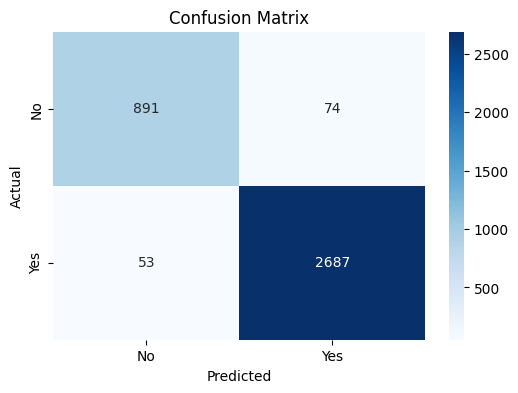

In [37]:
# Step 10: Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

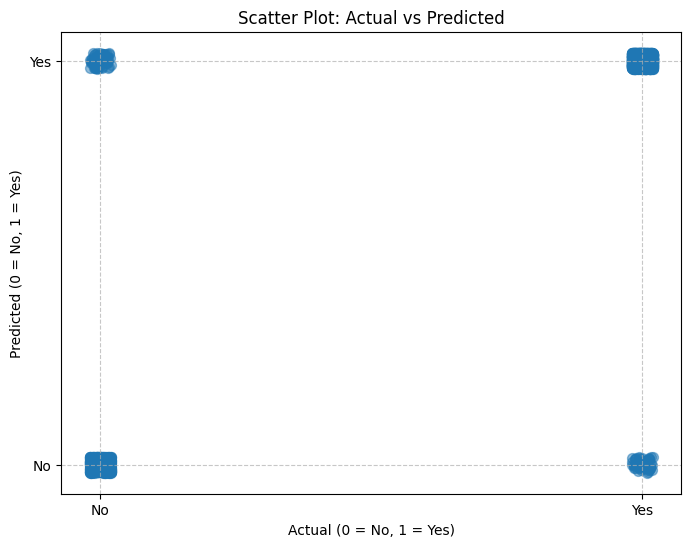

In [38]:
# Step 9: Create scatter plot with jitter
jitter = 0.02  # Small random noise to avoid overlap
y_actual_jitter = y_test + np.random.uniform(-jitter, jitter, size=len(y_test))
y_pred_jitter = y_pred + np.random.uniform(-jitter, jitter, size=len(y_pred))

plt.figure(figsize=(8, 6))
plt.scatter(y_actual_jitter, y_pred_jitter, alpha=0.5, s=50)
plt.xlabel('Actual (0 = No, 1 = Yes)')
plt.ylabel('Predicted (0 = No, 1 = Yes)')
plt.title('Scatter Plot: Actual vs Predicted')
plt.xticks([0, 1], ['No', 'Yes'])
plt.yticks([0, 1], ['No', 'Yes'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [39]:
test_df=pd.read_csv('/kaggle/input/int-and-ext/test.csv')
test_df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0


In [40]:
test_df.shape

(6175, 8)

In [41]:
test_df.isna().sum()

id                             0
Time_spent_Alone             425
Stage_fear                   598
Social_event_attendance      397
Going_outside                466
Drained_after_socializing    432
Friends_circle_size          350
Post_frequency               408
dtype: int64

In [42]:
test_df['Drained_after_socializing'].fillna('Yes', inplace=True)
test_df['Stage_fear'].fillna('Yes', inplace=True)
test_df.isna().sum()

/tmp/ipykernel_13/1498796315.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Drained_after_socializing'].fillna('Yes', inplace=True)
/tmp/ipykernel_13/1498796315.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

id                             0
Time_spent_Alone             425
Stage_fear                     0
Social_event_attendance      397
Going_outside                466
Drained_after_socializing      0
Friends_circle_size          350
Post_frequency               408
dtype: int64

In [43]:
test_df['Time_spent_Alone'].fillna(df['Time_spent_Alone'].median(), inplace=True)
test_df['Social_event_attendance'].fillna(df['Social_event_attendance'].mean(), inplace=True)
test_df['Going_outside'].fillna(df['Going_outside'].mean(), inplace=True)
test_df['Friends_circle_size'].fillna(df['Friends_circle_size'].mean(), inplace=True)
test_df['Post_frequency'].fillna(df['Post_frequency'].mean(), inplace=True)
test_df.isna().sum()

/tmp/ipykernel_13/3918505844.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Time_spent_Alone'].fillna(df['Time_spent_Alone'].median(), inplace=True)
/tmp/ipykernel_13/3918505844.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

id                           0
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
dtype: int64

In [44]:
test_df.shape

(6175, 8)

In [45]:
xx = test_df.drop('id', axis=1) 

In [46]:
xx.shape

(6175, 7)

In [47]:
xx.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,3.0,No,7.0,4.0,No,6.0,4.982097
1,2.0,Yes,0.0,0.0,Yes,5.0,1.000000
2,3.0,No,5.0,6.0,No,15.0,9.000000
3,3.0,No,4.0,4.0,No,5.0,6.000000
4,9.0,Yes,1.0,2.0,Yes,1.0,1.000000


In [48]:
# Step 6: Fit and transform the features using the pipeline
X_transformed = pipeline.fit_transform(xx)

In [49]:
# Convert transformed data back to DataFrame for inspection
feature_names = (pipeline.named_steps['preprocessor']
                    .named_transformers_['cat']
                    .named_steps['onehot']
                    .get_feature_names_out(categorical_features)).tolist() + numerical_features
X_transformed_df = pd.DataFrame(X_transformed, columns=feature_names, index=xx.index)

In [50]:
y_pred_test= model_pipeline.predict(xx)

In [51]:
print(y_pred_test[:5])


[1 0 1 1 0]


In [52]:
y_pred_test.shape

(6175,)

In [53]:
# y_labels = ['Extrovert' if val == 1 else 'Introvert' for val in y_pred_test]
# y_labels.head()

In [54]:
y_labels = np.where(y_pred_test == 1, 'Extrovert', 'Introvert')
print(y_labels[:5])

['Extrovert' 'Introvert' 'Extrovert' 'Extrovert' 'Introvert']


In [55]:
y_labels_series = pd.Series(y_labels)
print(y_labels_series.head())


0    Extrovert
1    Introvert
2    Extrovert
3    Extrovert
4    Introvert
dtype: object


In [56]:
# Step 1: Load your CSV
submission= pd.read_csv("/kaggle/input/int-and-ext/sample_submission.csv")  # Replace with actual file name

In [57]:
submission.head()

,id,Personality
0,18524,Extrovert
1,18525,Extrovert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Extrovert


In [58]:
submission.shape

(6175, 2)

In [59]:
y_labels = ['Extrovert' if val == 1 else 'Introvert' for val in y_pred_test]

In [60]:
submission['Personality'] = y_labels 

In [61]:
submission.shape

(6175, 2)

In [62]:
submission.head(10)

,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert
5,18529,Extrovert
6,18530,Extrovert
7,18531,Introvert
8,18532,Extrovert
9,18533,Introvert


In [63]:




# Step 4: Save the updated CSV
submission.to_csv("updated_file_new.csv", index=False)

print("✅ CSV updated successfully!")

✅ CSV updated successfully!


In [64]:
from sklearn.ensemble import RandomForestClassifier
model_pipeline_random_forest = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [65]:
# Step 7: Train the model
model_pipeline_random_forest.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Stage_fear',
                                                   'Drained_after_socializing']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Time_spent_Alone',
                                                   'Social_event_attendance',
                                                   'Going_outside',
                                                   'Friends_circle_size',
                                                   'Post_frequency'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [66]:
# Step 8: Make predictions
y_pred_rf = model_pipeline_random_forest.predict(X_test)

In [67]:
# Step 9: Calculate metrics
accuracy = accuracy_score(y_test, y_pred_rf)
error_rate = 1 - accuracy
f1 = f1_score(y_test, y_pred_rf)
mae = mean_absolute_error(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)

In [68]:
# Print metrics
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Error Rate: {error_rate:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

Evaluation Metrics:
Accuracy: 0.9601
Error Rate: 0.0399
F1 Score: 0.9732
Mean Absolute Error (MAE): 0.0399

Confusion Matrix:
[[ 874   91]
 [  57 2683]]

Classification Report:
              precision    recall  f1-score   support

          No       0.94      0.92      0.93       965
         Yes       0.97      0.98      0.98      2740

    accuracy                           0.97      3705
   macro avg       0.96      0.95      0.96      3705
weighted avg       0.97      0.97      0.97      3705



In [69]:
y_pred_test_rf= model_pipeline_random_forest.predict(xx)

In [70]:
y_pred_test_rf.shape

(6175,)

In [71]:
y_labels_rf = np.where(y_pred_test_rf == 1, 'Extrovert', 'Introvert')
print(y_labels_rf[:5])

['Extrovert' 'Introvert' 'Extrovert' 'Extrovert' 'Introvert']


In [72]:
# Step 1: Load your CSV
sub= pd.read_csv("/kaggle/input/int-and-ext/sample_submission.csv")  # Replace with actual file name

In [73]:
sub['Personality'] = y_labels_rf
sub.shape

(6175, 2)

In [74]:
# Step 4: Save the updated CSV
sub.to_csv("updated_file_rf.csv", index=False)

print("✅ CSV updated successfully!")

✅ CSV updated successfully!
